# Analyse d'avis pour Disneyland

Dans l'ère digitiale, la plupart des entreprises ont de nombreuses sources de retours client tels que les réseaux sociaux ou les applications numériques pour ne citer qu'elles.
L'idée de ce projet est de se mettre dans la peau de Data Scientists travaillant pour le compte de Disney, et soucieux de rendre les clients visitant les parcs les plus satisfaits possible. En effet, Disneyland est un parc "Là où vit la magie !".
Le but de cette analyse de données est de trouver des actions concrètes pour améliorer ce qu'il ne va pas, mais aussi de voir ce qui est apprécié.

Les données que nous utilisons viennent du site kaggle : [lien](https://www.kaggle.com/arushchillar/disneyland-reviews).
Le jeu de données inclut 42 000 avis de 3 sites Disneyland (Paris, Hong Kong, et Californie) qui ont été publié sur Trip Advisor.
Il contient les colonnes suivantes :
- Review_ID: identifiant unique de chaque avis
- Rating: note de 1 (insatisfait) à 5 (très satisfait)
- Year_Month: l'année et le mois de la visite du parc
- Reviewer_Location: pays d'origine du client
- Review_Text: commentaire du client
- Disneyland_Branch: site Disneyland

In [1]:
#Useful librairies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import spacy

from gensim import corpora
import numpy as np
np.random.seed(2020)
import nltk
from wordcloud import WordCloud
from nltk.util import ngrams
import collections
import pickle
import ast
from gensim.corpora import Dictionary
from gensim.models import HdpModel,LsiModel

nltk.download('wordnet')
from matplotlib import cm
from nltk.corpus import stopwords
nltk.download('stopwords')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Іванна\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Іванна\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv("DisneylandReviews.csv", encoding='ISO-8859-1')

In [3]:
data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


## Exploration des données

Nous venons d'importer les données et les librairies utiles pour notre projet.
Nous voyons déjà que nous avons des données pour la colonne Year_Month. Avons-nous d'autre données manquantes ?
Nous allons également vérifier si nous avons des données dupliquées.

In [4]:
#Duplicated data?
data[data.duplicated(keep=False)]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
7939,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
7949,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
8814,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong
8815,129214104,3,2012-4,Malaysia,Like: Back to the time with Disney characters....,Disneyland_HongKong
8816,129207323,5,2011-9,Australia,Having never been to any Disneyland I was thri...,Disneyland_HongKong
8823,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong
8824,129214104,3,2012-4,Malaysia,Like: Back to the time with Disney characters....,Disneyland_HongKong
8825,129207323,5,2011-9,Australia,Having never been to any Disneyland I was thri...,Disneyland_HongKong
9174,121586148,4,2011-5,Australia,Only a single day adventure. Not as good as d...,Disneyland_HongKong
9175,121580686,4,2011-3,United States,"Very small, they are expanding but at a slow p...",Disneyland_HongKong


In [5]:
#Do we have missing values?
data.describe(include='all')

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
count,4.265600e+04,42656.000000,42656,42656,42656,42656
unique,NaN,NaN,112,162,42632,3
top,NaN,NaN,missing,United States,Hong Kong Disneyland is a very clean and lovel...,Disneyland_California
freq,NaN,NaN,2613,14551,2,19406
mean,3.188553e+08,4.217695,NaN,NaN,NaN,NaN
std,1.657092e+08,1.063371,NaN,NaN,NaN,NaN
min,1.398724e+06,1.000000,NaN,NaN,NaN,NaN
25%,1.743274e+08,4.000000,NaN,NaN,NaN,NaN
50%,2.907583e+08,5.000000,NaN,NaN,NaN,NaN
75%,4.489579e+08,5.000000,NaN,NaN,NaN,NaN


In [6]:
#Looking at the table above, we can see that we have duplicates in Review_Text
#with different Review_IDs
data[data['Review_Text'].duplicated(keep=False)]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
6064,268817357,4,2015-4,United States,Hong Kong Disneyland is a very clean and lovel...,Disneyland_HongKong
6065,268817356,4,2015-4,United States,Hong Kong Disneyland is a very clean and lovel...,Disneyland_HongKong
6622,239871388,4,2014-10,Canada,"Disneyland, Hong Kong Disneyland (Hong Kong) i...",Disneyland_HongKong
6656,239015375,4,2014-10,Canada,"Disneyland, Hong Kong Disneyland (Hong Kong) i...",Disneyland_HongKong
7939,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
7949,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
8680,133668239,5,missing,Hong Kong,I am a Hongkonger and an international travell...,Disneyland_HongKong
8684,133552193,5,missing,Hong Kong,I am a Hongkonger and an international travell...,Disneyland_HongKong
8814,129231609,5,2012-4,United States,Let me just start off by saying that although ...,Disneyland_HongKong
8815,129214104,3,2012-4,Malaysia,Like: Back to the time with Disney characters....,Disneyland_HongKong


In [7]:
data=data[data['Review_Text']!='ActiveX VT ERROR: ']

In [8]:
data=data.drop_duplicates(subset='Review_Text', keep='first')

## Visualisation des données

Nous avons supprimé les valeurs dupliquées. Et les valeurs manquantes se retrouvent dans la colonne Year_Month. On a donc décidé de garder ces lignes pour l'analyse.

Nous allons maintenant regarder la répartition de nos données.

In [9]:
nb_rating = data['Rating'].value_counts().sort_values(ascending=True)
print(nb_rating)

1     1499
2     2125
3     5107
4    10768
5    23132
Name: Rating, dtype: int64


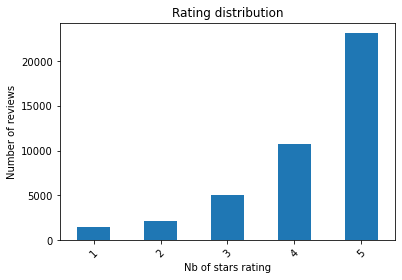

In [10]:
# Bar plotting the rating distribution
nb_rating.plot.bar()

plt.title("Rating distribution")
plt.xticks(rotation=45)
plt.xlabel("Nb of stars rating")
plt.ylabel("Number of reviews")
plt.show()

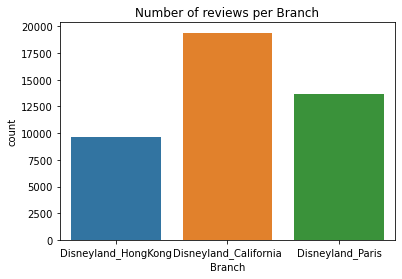

In [11]:
sns.countplot(x='Branch', data=data)
plt.title('Number of reviews per Branch')
plt.show()

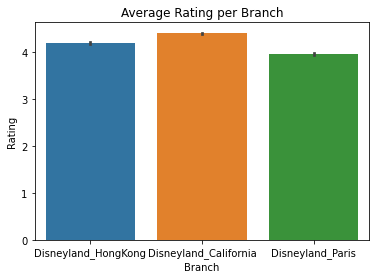

In [12]:
sns.barplot(x='Branch', y='Rating', data=data)
plt.title('Average Rating per Branch')
plt.show()

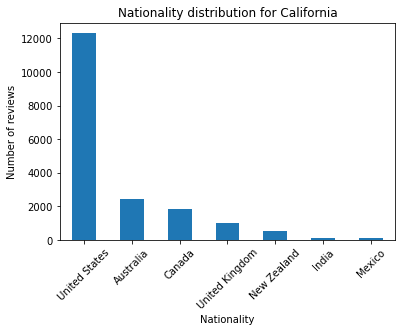

In [13]:
data[data['Branch']=='Disneyland_California'].value_counts('Reviewer_Location').iloc[:7].plot.bar()
plt.title("Nationality distribution for California")
plt.xticks(rotation=45)
plt.xlabel("Nationality")
plt.ylabel("Number of reviews")
plt.show()

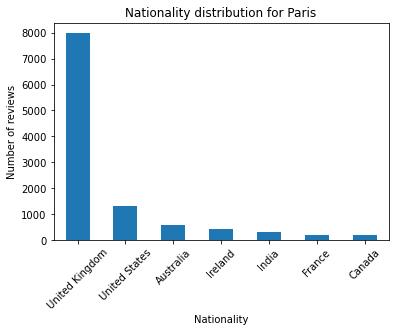

In [14]:
data[data['Branch']=='Disneyland_Paris'].value_counts('Reviewer_Location').iloc[:7].plot.bar()
plt.title("Nationality distribution for Paris")
plt.xticks(rotation=45)
plt.xlabel("Nationality")
plt.ylabel("Number of reviews")
plt.show()

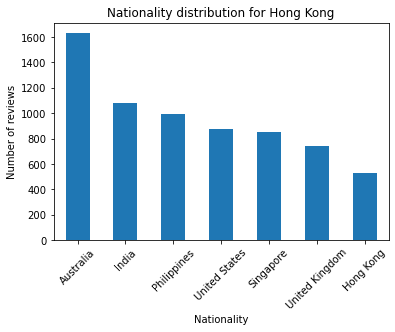

In [15]:
data[data['Branch']=='Disneyland_HongKong'].value_counts('Reviewer_Location').iloc[:7].plot.bar()
plt.title("Nationality distribution for Hong Kong")
plt.xticks(rotation=45)
plt.xlabel("Nationality")
plt.ylabel("Number of reviews")
plt.show()

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

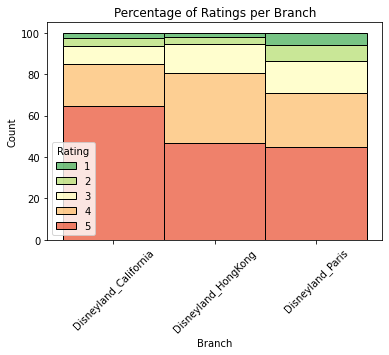

In [16]:
grouped_df=data.groupby(['Branch','Rating']).agg(rating_perc=('Rating','count')).groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()
g=sns.histplot(
    data=grouped_df,
    x="Branch", hue="Rating", weights="rating_perc",
    multiple="stack", discrete=True, palette=sns.color_palette('RdYlGn_r',5)
)
plt.title('Percentage of Ratings per Branch')
plt.xticks(rotation=45)

Sur l'ensemble des graphiques de cette section, nous voyons :
- Que le jeu de données contient plus de bonnes notes que de mauvaises,
- Que nous avons plus d'avis pour le site de Californie,
- Que le jeu de données contient de meilleures notes en moyenne pour le site de Californie et de moins bonnes notes en moyenne pour le site Parisien (le graphe ci-dessus le montre aussi d'ailleurs),
- Que nous avons plus d'avis de gens d'origine états-unienne dans le jeu de données pour le site de Californie, de Grande-Bretagne pour Paris, et d'Australie pour Hong Kong.

## Reviews en fonction du temps

Pour avoir l'évolution des notes en fonction du temps, il faut d'abord extraire l'année et le mois de la colonne Year_Month.

In [17]:
data['Year'] = data["Year_Month"].str.split("-", n = 1, expand = True)[0]
data['Month'] = data["Year_Month"].str.split("-", n = 1, expand = True)[1]
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['Year_Month'] = pd.to_datetime(data['Year_Month'], errors='coerce')

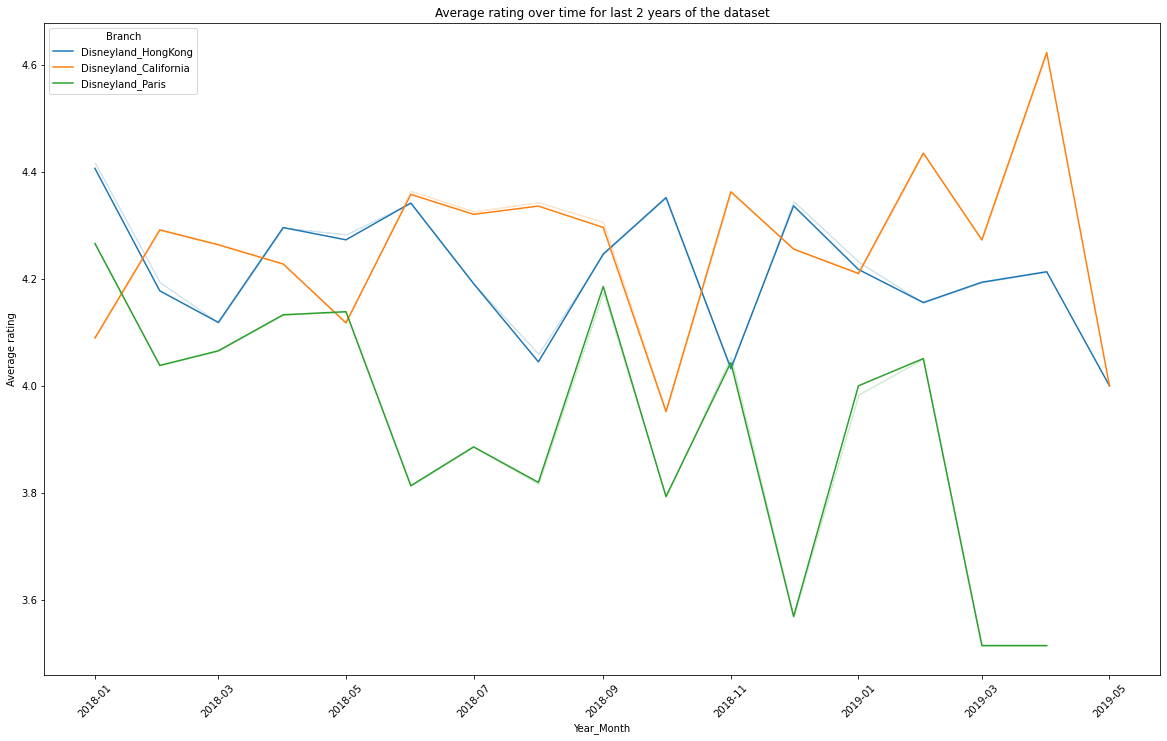

In [18]:
#Average rating over time for last 2 years of the dataset
data_graph = data[data['Year']>2017]
plt.figure(figsize=(20,12))
sns.lineplot(data=data_graph, x='Year_Month', y='Rating', hue='Branch', ci=False)
plt.title("Average rating over time for last 2 years of the dataset")
plt.xticks(rotation=45)
plt.ylabel("Average rating")
plt.show()

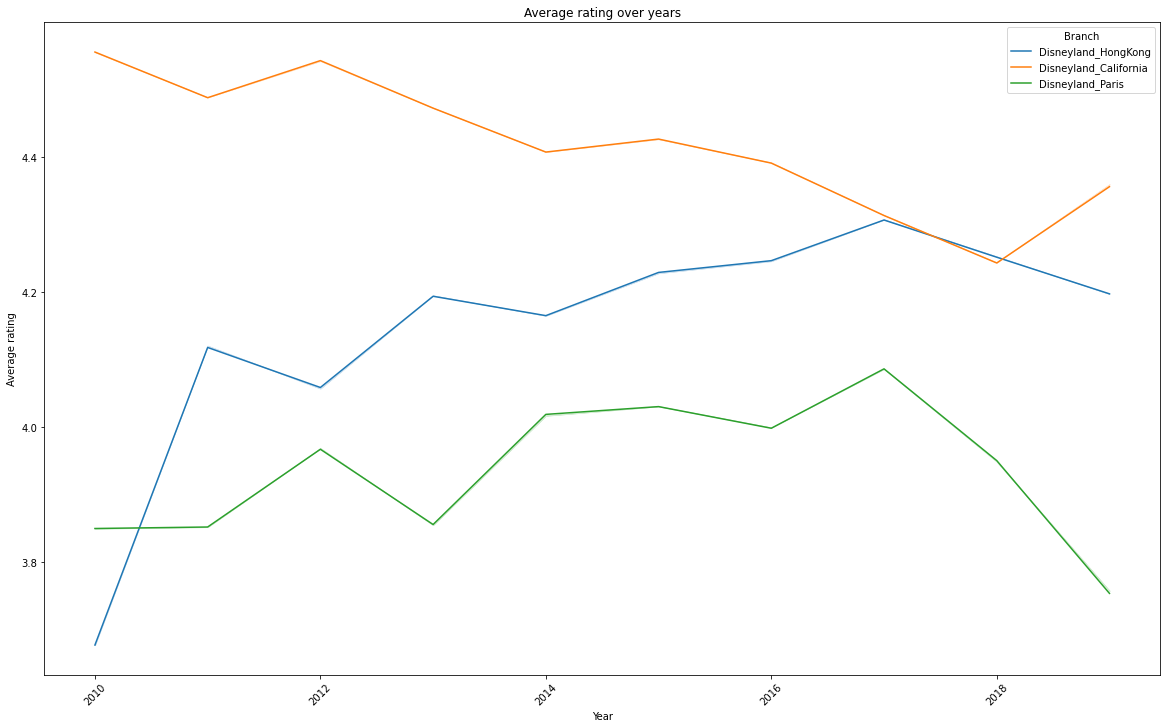

In [19]:
plt.figure(figsize=(20,12))
sns.lineplot(data=data, x='Year', y='Rating', hue='Branch', ci=False)
plt.title("Average rating over years")
plt.xticks(rotation=45)
plt.ylabel("Average rating")
plt.show()

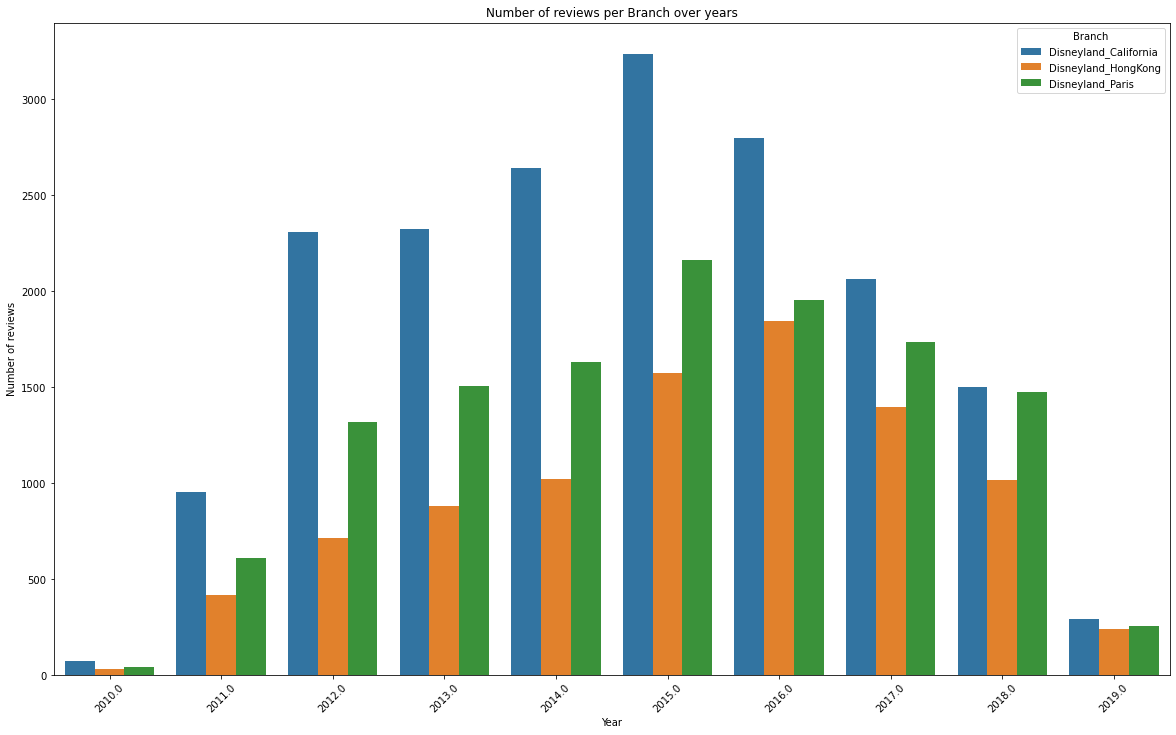

In [20]:
# Number of review per year graph
data_graph = data.groupby(by=["Year", "Branch"]).count().reset_index()
plt.figure(figsize=(20,12))
sns.barplot(data=data_graph, x='Year', y='Rating', hue='Branch', ci=False)
plt.title("Number of reviews per Branch over years")
plt.xticks(rotation=45)
plt.ylabel("Number of reviews")
plt.show()

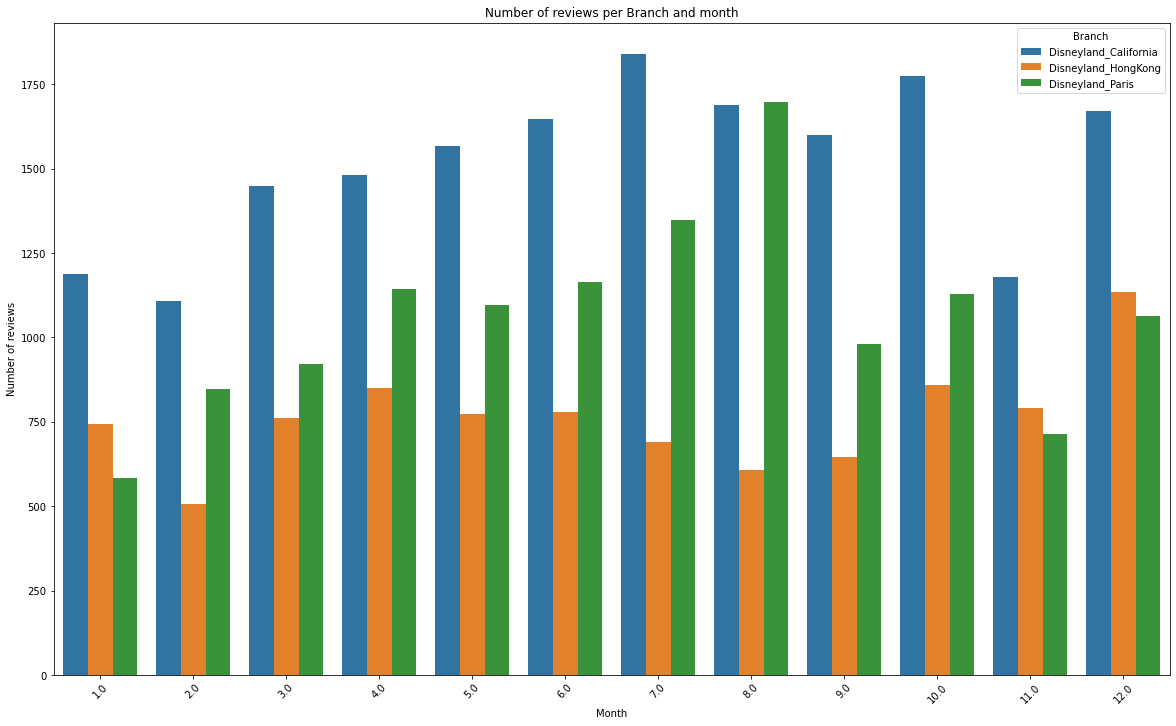

In [21]:
#Number of review per month
# Number of review per year graph
data_graph = data.groupby(by=["Month", "Branch"]).count().reset_index()
plt.figure(figsize=(20,12))
sns.barplot(data=data_graph, x='Month', y='Rating', hue='Branch', ci=False)
plt.title("Number of reviews per Branch and month")
plt.xticks(rotation=45)
plt.ylabel("Month Number")
plt.ylabel("Number of reviews")
plt.show()

Sur la série de graphiques ci-dessus, nous voyons :
- Que les notes du jeu de données decroîssent pour Paris et la Californie, et qu'elles ont monté pour Hong Kong,
- Que nous avons le plus d'avis vers 2015-2016,
- Que nous avons le plus d'avis en été en pour le mois de Décembre (probablement lié aux vacances scolaires).

## Longueur du commentaire en fonction de la note

In [22]:
def mean_length(no_stop):
    element = []

    for i in no_stop:
        element.append(len(i))
#     print('The average length of reviews after removing punctuation and stopwords :',
    return np.mean(element)

In [23]:
review_length_df=pd.DataFrame()
for i in data['Rating'].unique():
    review_length_df.loc[i,'rating']=i
    review_length_df.loc[i,'average_length']=data[data["Rating"]==i]['Review_Text'].apply(len).mean()

In [24]:
review_length_df

,rating,average_length
4,4.0,746.737741
3,3.0,832.583709
5,5.0,591.967448
2,2.0,1004.983059
1,1.0,1061.593062


<AxesSubplot:xlabel='rating'>

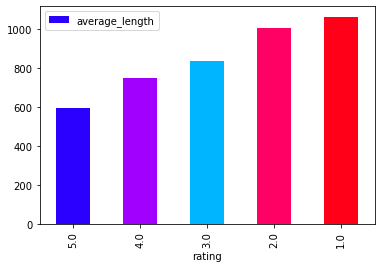

In [25]:
colors = cm.hsv(review_length_df['average_length'] / float(max(review_length_df['average_length'])))
review_length_df.sort_values('rating',ascending=False).plot.bar(x='rating',y='average_length',color = colors)

Sans grande surprise, on trouve que les commentaires les plus négatifs sont les plus longs (en nombre de caractères).

## Text preprocessing et exploration des reviews

Pour le text preprocessing, on procède de la manière suivante:
- On retire les url
- les caractères spéciaux 
- les chiffres
- et on remplace plusieurs espaces par un seul
<br> Puis on enlève les 'stopswords" et on fait la lemmatisation avec spacy. La lemmatisation consiste à ramener un terme, quels que soient ses accords, déclinaisons, etc. à sa forme la plus simple). Pendant la lemmatisation on fait également la tokenization (séparation de phrases en mots). Après la lemmatisation on enlève de nouveau les 'stopswords'. Ainsi on procède avec les n-grams pour trouver les mots les plus fréquents dans les avis qu'on a dans notre base de données.

In [26]:
data['cleaned_reviews']=data['Review_Text'].str.replace('(https?://\S+)', ' ',regex=True)

In [27]:
data['cleaned_reviews']=data['cleaned_reviews'].str.replace('\W', ' ',regex=True)

In [28]:
data['cleaned_reviews']=data['cleaned_reviews'].str.replace('\d+', ' ',regex=True)

In [29]:
data['cleaned_reviews']=data['cleaned_reviews'].str.replace('\s+', ' ',regex=True)

In [30]:
stoplist = stopwords.words('english')

In [31]:
data['cleaned_reviews']=data['cleaned_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))

In [32]:
final = [k for k in data['cleaned_reviews']]

In [33]:
lemmatized_docs=[]
sp = spacy.load('en_core_web_sm')
for doc in final:
    tokens = [token.lemma_ for token in sp(doc.lower())] 
    lemmatized_docs.append(tokens)

In [34]:
no_stop=[[t for t in i if t not in stoplist] for i in lemmatized_docs]

In [35]:
def ngram(flat_list,n):
    ngram= ngrams(flat_list, n)
    return collections.Counter(ngram).most_common()

In [36]:
flat_list=[]
for sublist in no_stop:
    for item in sublist:
        flat_list.append(item)

<AxesSubplot:xlabel='0'>

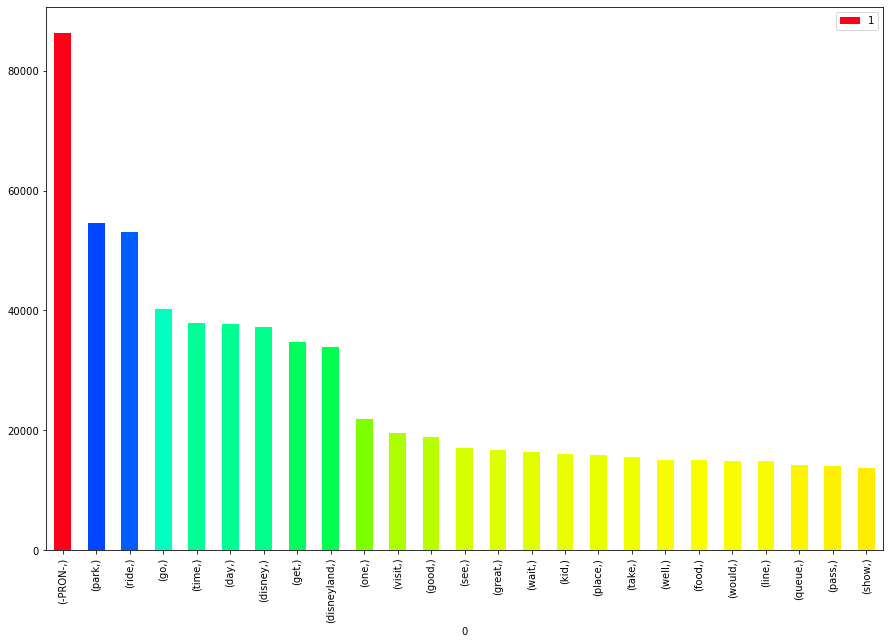

In [37]:
dist_df=pd.DataFrame(ngram(flat_list,1)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

<AxesSubplot:xlabel='0'>

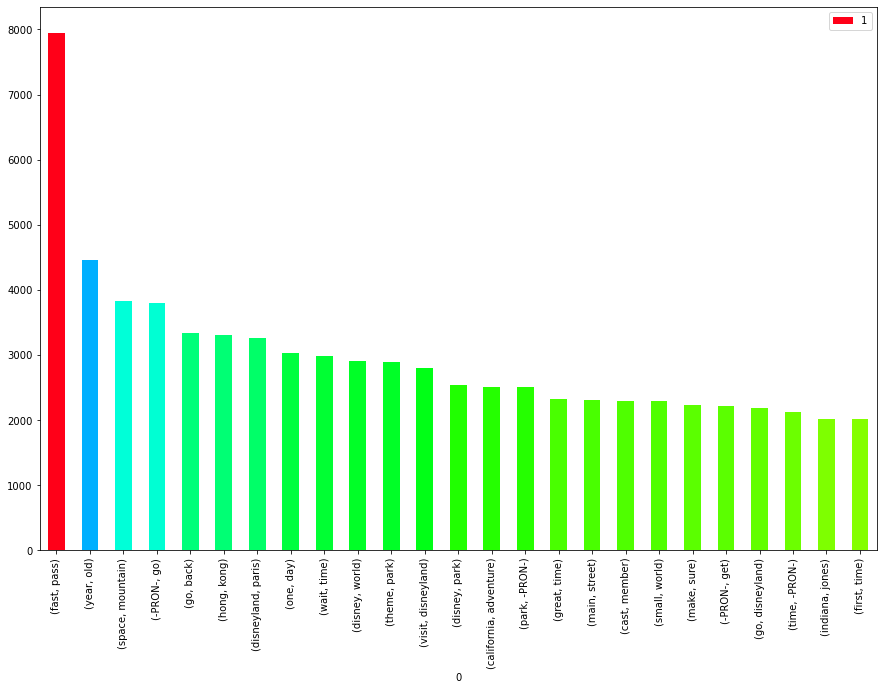

In [38]:
dist_df=pd.DataFrame(ngram(flat_list,2)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

Ici -PRON- veut dire pronom. Puisque les pronoms ne sont pas très utiles pour analyser le contexte de notre base de données on peut les enlever. Aussi les mots comme 'disney','paris' et 'disneyland' peuvent être enlevés puisqu'ils sont très frequents.

In [39]:
stoplist.extend(['-PRON-','paris','disneyland','disney'])

In [40]:
no_stop=[[t for t in i if t not in stoplist] for i in lemmatized_docs]

In [41]:
data['cleaned_reviews']=no_stop #creating new column with cleaned reviews

In [42]:
data.to_excel('cleaned_data.xlsx')

In [43]:
flat_list=[]
for sublist in no_stop:
    for item in sublist:
        flat_list.append(item)

## Bigrams for ALL reviews

<AxesSubplot:xlabel='0'>

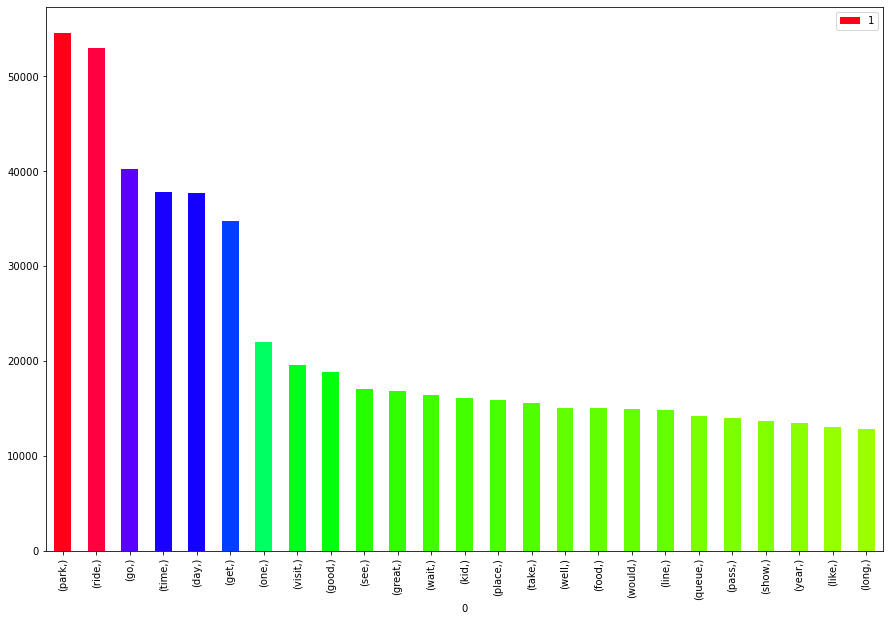

In [44]:
dist_df=pd.DataFrame(ngram(flat_list,1)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

<AxesSubplot:xlabel='0'>

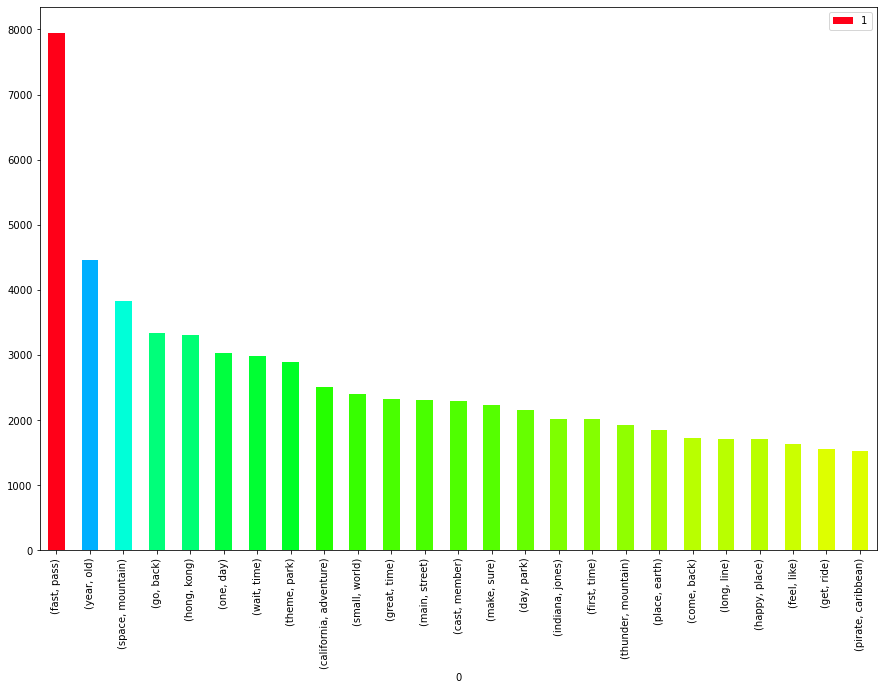

In [45]:
dist_df=pd.DataFrame(ngram(flat_list,2)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

<AxesSubplot:xlabel='0'>

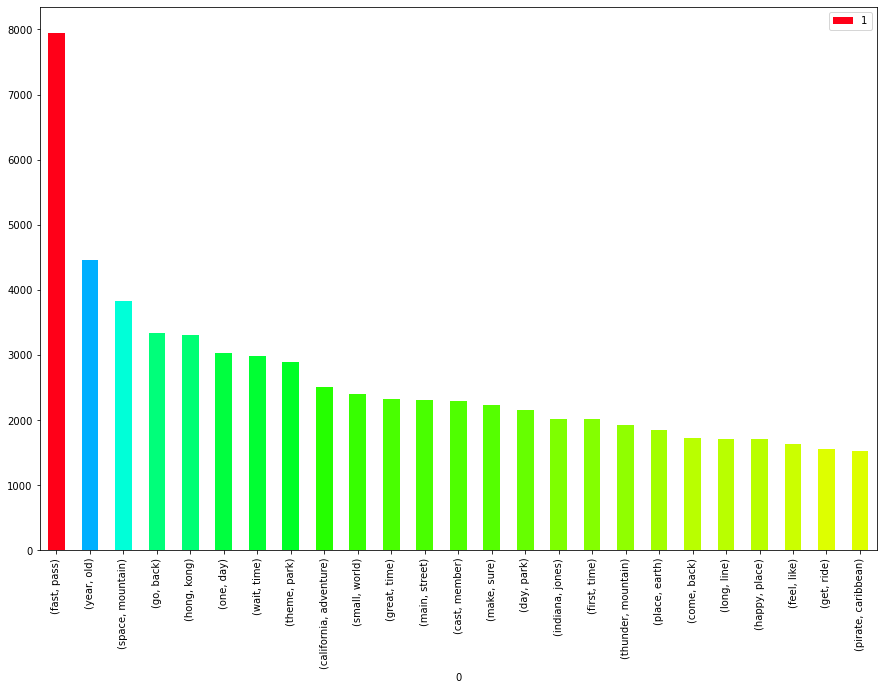

In [46]:
dist_df=pd.DataFrame(ngram(flat_list,2)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

<AxesSubplot:xlabel='0'>

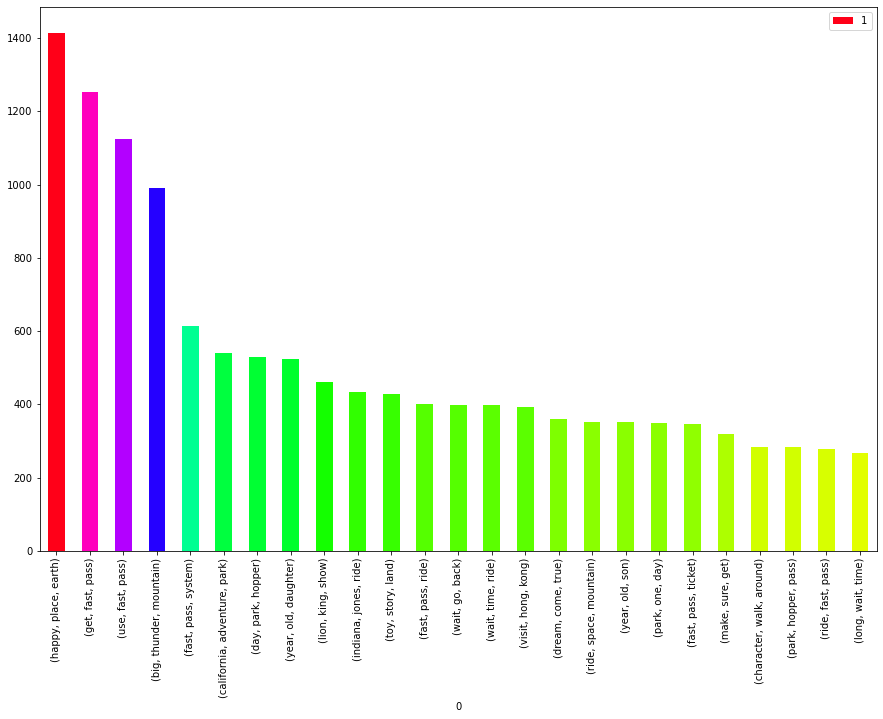

In [47]:
dist_df=pd.DataFrame(ngram(flat_list,3)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

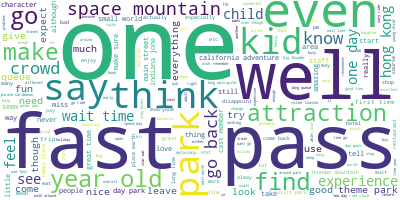

In [48]:
my_lst_str = " ".join(flat_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(my_lst_str)
# Visualize the word cloud, in order to see the words which are the most frequent in our document
wordcloud.to_image()

In [49]:
data.to_excel('cleaned_data.xlsx')

## Bigrams for Bad reviews

In [50]:
flat_list=[]
for sublist in data[data['Rating']<3]['cleaned_reviews']:
    for item in sublist:
        flat_list.append(item)

<AxesSubplot:xlabel='0'>

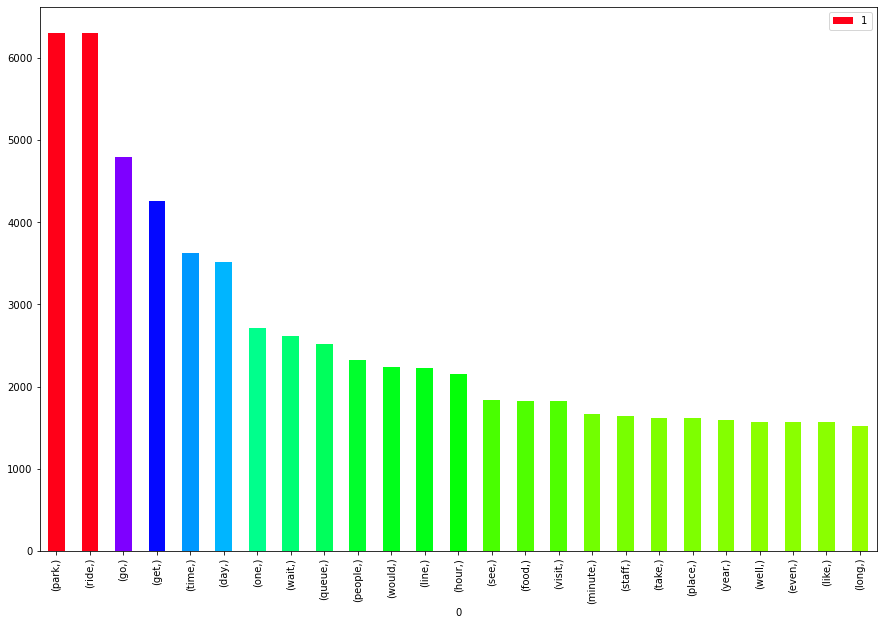

In [51]:
dist_df=pd.DataFrame(ngram(flat_list,1)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

<AxesSubplot:xlabel='0'>

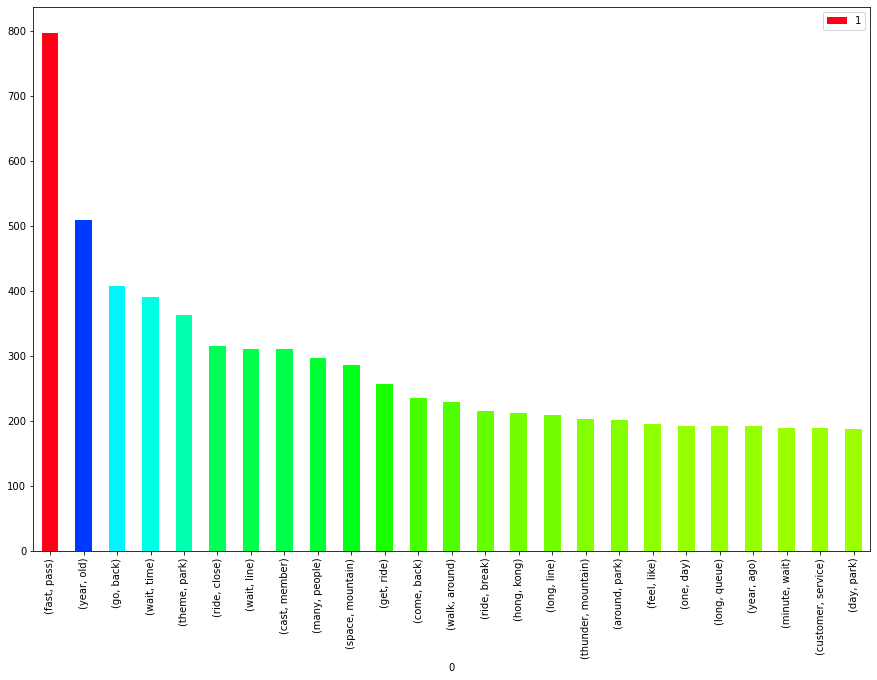

In [52]:
dist_df=pd.DataFrame(ngram(flat_list,2)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

<AxesSubplot:xlabel='0'>

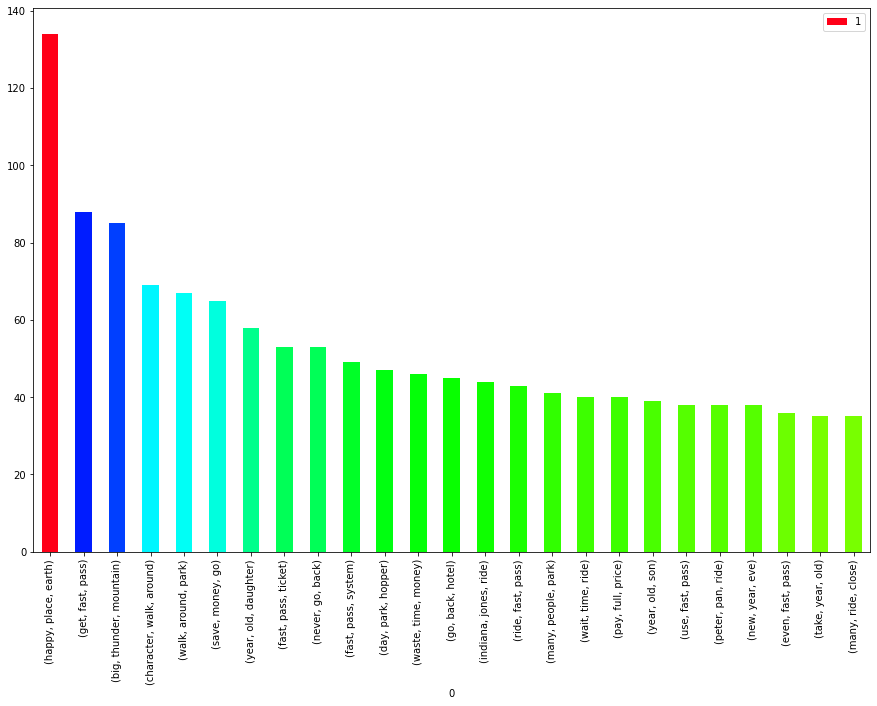

In [53]:
dist_df=pd.DataFrame(ngram(flat_list,3)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

Pour les mauvaises revues, parmis les mots qui apparaissent fréquemment, on trouve :
- get fast pass, waste time, many people, long queue, broken rides
- big thunder mountain, indiana jones, peter pan, space mountain, rides (attraction)
- save money, pay

Le prix des parcs est élevé, des attractions phares semblent être indisponibles, et il y a beaucoup de monde et de queue avant de faire une attraction.

## Bigrams for Good reviews

In [54]:
flat_list=[]
for sublist in data[data['Rating']>3]['cleaned_reviews']:
    for item in sublist:
        flat_list.append(item)

<AxesSubplot:xlabel='0'>

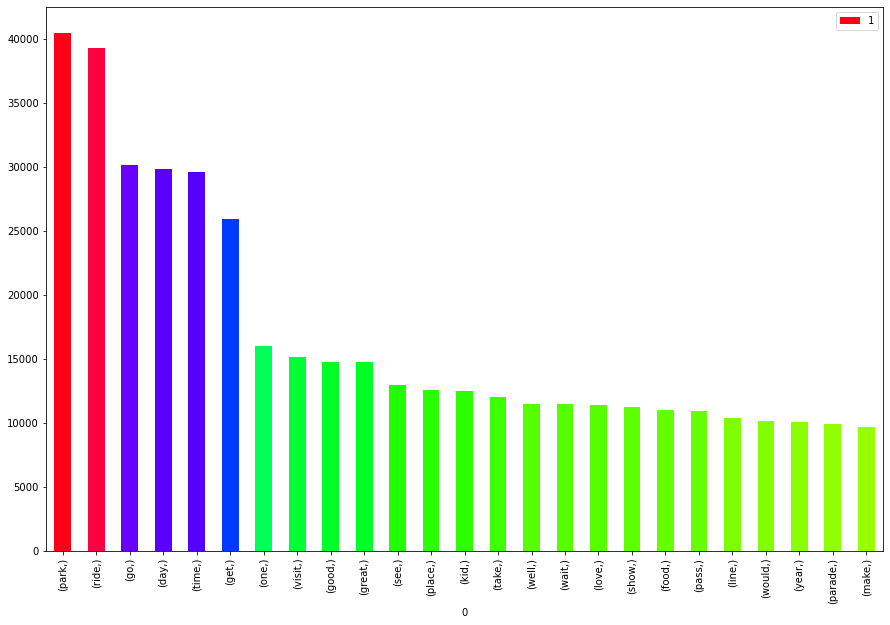

In [55]:
dist_df=pd.DataFrame(ngram(flat_list,1)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

<AxesSubplot:xlabel='0'>

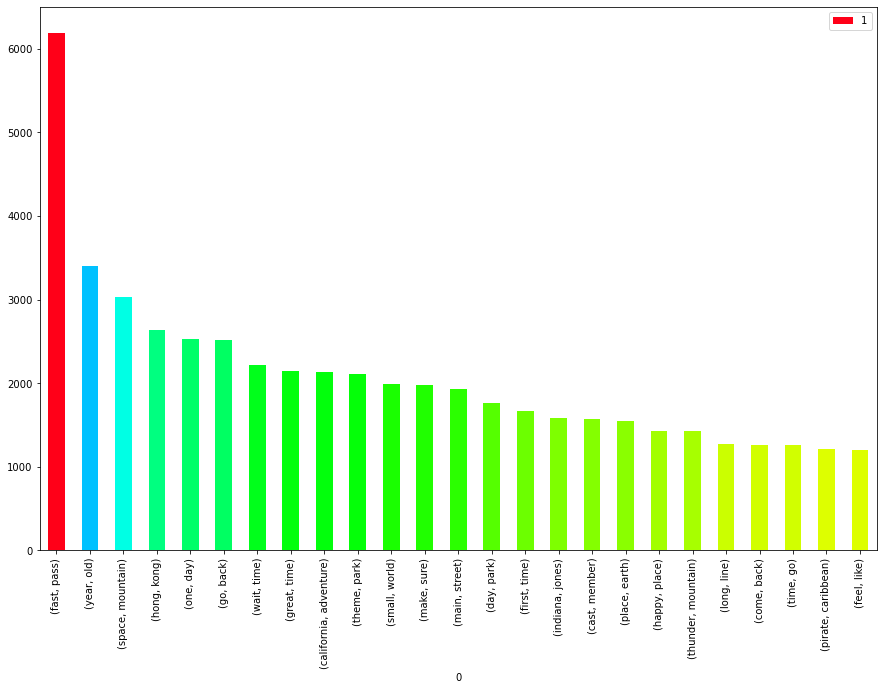

In [56]:
dist_df=pd.DataFrame(ngram(flat_list,2)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

<AxesSubplot:xlabel='0'>

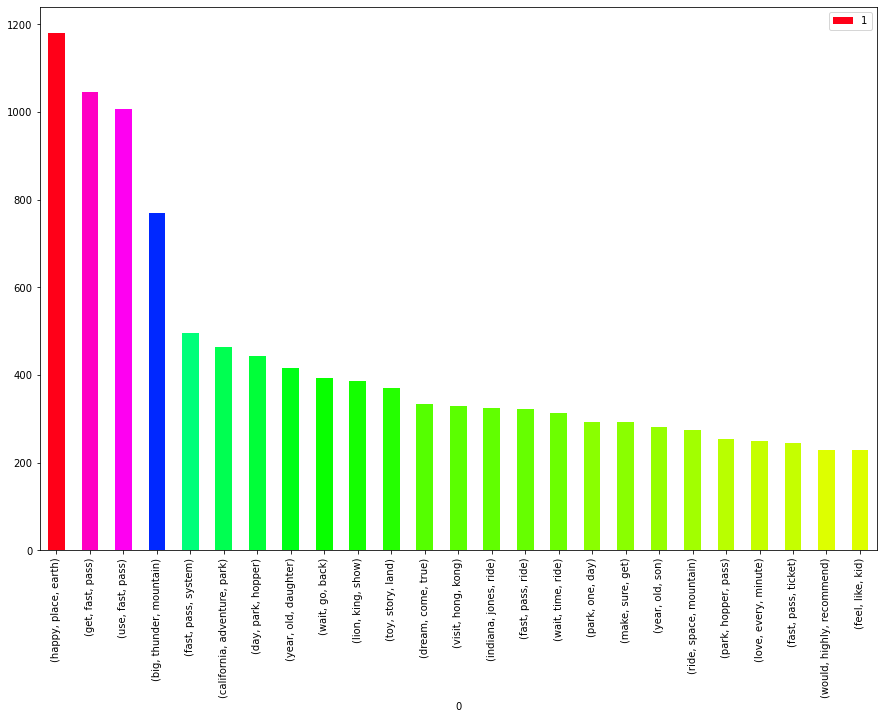

In [57]:
dist_df=pd.DataFrame(ngram(flat_list,3)[:25])
colors = cm.hsv(dist_df[1] / float(max(dist_df[1])))
dist_df.plot.bar(x=0,y=1, rot=90,figsize=(15,10),color=colors)

Le nombre de revues positives étant plus élévé, dans les mots les plus fréquents, on voit "happy place on earth", "dream come true", et les différentes attractions.

## Analyse par attraction

Puisqu'on a vu que les noms des attractions apparaissent souvent dans les bonnes et mauvaises revues. On décide de regarder plus en détails les revues de certaines attractions.

In [58]:
data=pd.read_excel('cleaned_data.xlsx')

In [59]:
data['cleaned_reviews_old']=data['cleaned_reviews']

In [60]:
#Converting list representation into list
for i in range(len(data)):
    data['cleaned_reviews'][i] = ast.literal_eval(data['cleaned_reviews'].values[i])

C:\Users\Іванна\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
test = data.iloc[[0]]['cleaned_reviews']

In [62]:
def find_attraction_bigram(attraction_list=[],data=data):
    for a in attraction_list:
        data[''+a] = False
    for i in range(len(data)):
        for (x,y) in zip(data['cleaned_reviews'][i][0:], data['cleaned_reviews'][i][1:]):
            for a in attraction_list:
                a_words = a.split()
                if x == a_words[0] and y == a_words[1]:
                    data[''+a][i] = True
    return data

In [63]:
def plot_wordcloud(sentences):

    #Flattening the no_stop list
    flat_list = [item for sublist in sentences for item in sublist]

    #tansforming our flat list of words into one big string 
    my_lst_str = " ".join(flat_list)
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(my_lst_str)
    # Visualize the word cloud, in order to see the words which are the most frequent in our document
    return wordcloud.to_image()

In [64]:
# Attention seulement attractions composées de 2 mots
attraction_list = ['space mountain', 'thunder mountain', 'indiana jones', 'peter pan','customer service','pirate caribbean']
data_att=find_attraction_bigram(attraction_list)

C:\Users\Іванна\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


**Space mountain & bad reviews**

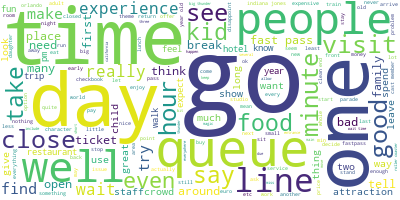

In [65]:
sentences_neg_space_mountain = data[(data['Rating'] <= 2) & (data['space mountain'])]['cleaned_reviews']
#sentences_neg_space_mountain = data[(data['Rating'] <= 2) & (data['space mountain'])]['Review_Text']
stoplist=['ride','park','space','mountain']
plot_wordcloud([t for t in [[t for t in i if t not in stoplist] for i in sentences_neg_space_mountain]])

**Peter Pan & bad reviews**

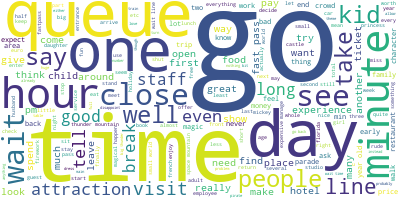

In [66]:
sentences_neg_att = data[(data['Rating'] <= 2) & (data['peter pan'])]['cleaned_reviews']
stoplist=['ride','park','peter','pan']
plot_wordcloud([t for t in [[t for t in i if t not in stoplist] for i in sentences_neg_att]])

**Thunder Mountain & bad reviews**

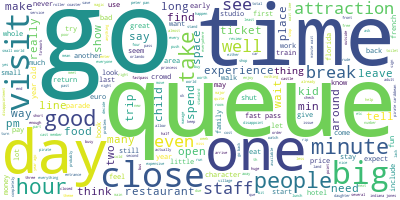

In [67]:
sentences_neg_att = data[(data['Rating'] <= 2) & (data['thunder mountain'])]['cleaned_reviews']
stoplist=['ride','park','thunder', 'mountain']
plot_wordcloud([t for t in [[t for t in i if t not in stoplist] for i in sentences_neg_att]])

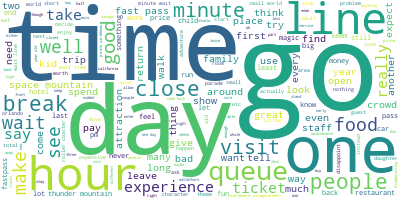

In [68]:
sentences_neg_att = data[(data['Rating'] <= 2) & (data['indiana jones'])]['cleaned_reviews']
stoplist=['ride','park','indiana', 'jones']
plot_wordcloud([t for t in [[t for t in i if t not in stoplist] for i in sentences_neg_att]])

In [69]:
df1 = data[data['Rating'] <= 2][['space mountain', 'thunder mountain', 'indiana jones', 'peter pan', 'pirate caribbean']].apply(pd.value_counts)

<AxesSubplot:>

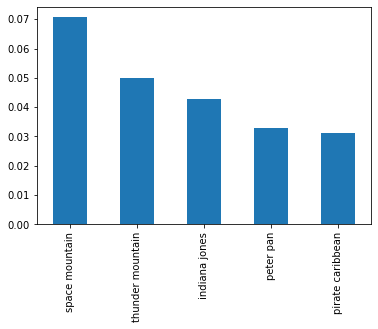

In [70]:
(df1.loc[True]/len(data[data['Rating'] <= 2])).plot.bar()

In [71]:
df1 = data[data['Rating'] >3][['space mountain', 'thunder mountain', 'indiana jones', 'pirate caribbean','peter pan']].apply(pd.value_counts)

<AxesSubplot:>

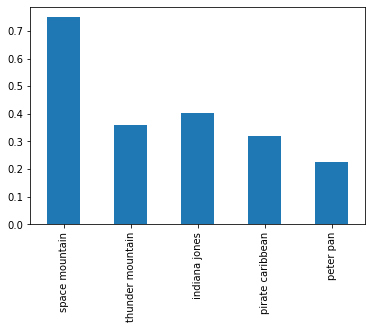

In [72]:
(df1.loc[True]/len(data[data['Rating'] <= 2])).plot.bar()

En prenant la même liste d'attractions pour les bonnes et mauvaises revues, on voit que la fréquence à laquelle les noms de ces attractions apparaissent dans les avis est à peu près la même.

On voit également que dans les mauvaises revues les mots les plus fréquents sont "queue", "closed", et les mots concernant le temps et sa durée.

**Customer service & bad reviews**

C:\Users\Іванна\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


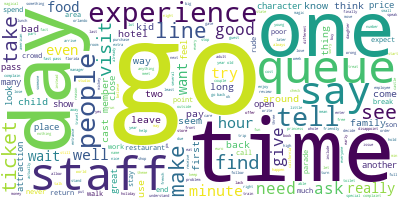

In [73]:
attraction_list = ['customer service']
find_attraction_bigram(attraction_list)
sentences_neg_att = data[(data['Rating'] <= 2) & (data['customer service'])]['cleaned_reviews']
stoplist=['customer','service','park','ride']
plot_wordcloud([t for t in [[t for t in i if t not in stoplist] for i in sentences_neg_att]])

## LDA for Topic modelling of Bad reviews

On essaye aussi d'appliquer des algorithmes de Topic Modelling pour voir les thèmes qui apparaissent dans les mauvaises revues. Pour cela on applique deux algorithmes de clustering : LDA (Latent Dirichlet allocation) et HDP (Hierarchical Dirichlet process).

LDA : chaque document est considéré comme un mélange de sujets, et chaque mot dans un document est considéré comme tiré au hasard parmis les sujets du document. Le nombre de thèmes en général est choisi par la cohérence. Il y a aussi d'autres paramètres qui peuvent être optimisés, mais dans notre cas, on fixe le nombre de thèmes avant de sorte à avoir des thèmes intéressants. En utilisant LDA pour la modélisation de documents, on traite chaque "sujet" comme une distribution de mots dans un vocabulaire connu. Pour chaque document, un mélange de sujets est tiré d'une distribution de Dirichlet, puis chaque mot du document est un tirage indépendant de ce mélange (c'est-à-dire en sélectionnant un sujet puis en l'utilisant pour générer un mot).

HDP : Il s'agit d'un variant non paramétrique de LDA. Le nombre de thèmes est calculé à partir des données. Pour HDP (appliqué à la modélisation de documents), on utilise également un processus de Dirichlet pour capturer l'incertitude sur le nombre de sujets. Ainsi, une distribution de base commune est sélectionnée qui représente l'ensemble dénombrable infini de sujets possibles pour le corpus, puis la distribution finie des sujets pour chaque document est échantillonnée à partir de cette distribution de base.

En ce qui concerne les avantages et les inconvénients, HDP a l'avantage que le nombre maximum de sujets peut être illimité et appris à partir des données plutôt que spécifié à l'avance.

In [74]:
neg_list=[ast.literal_eval(k) for k in data[data['Rating']<3]['cleaned_reviews_old']]

In [75]:
stoplist=['park','ride','hong','kong'] #removing some other words which often appear in the reviews and can bring noise to out model
neg_list=[[t for t in i if t not in stoplist] for i in neg_list]

In [76]:
new_neg_list=[[item for item in clist if len(item) >= 3] for clist in neg_list]#removing too small words

In [77]:
# Creation de dictionnaire pour notre model
dictionary = corpora.Dictionary(new_neg_list)
# Transformation en bag of words (sac de mots) de notre corpus
corpus = [dictionary.doc2bow(text) for text in new_neg_list]
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [78]:
import gensim
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50, random_state=42)
ldamodel.save('model5.gensim')
# topics = ldamodel.print_topics(num_words=10)
# for topic in topics:
#     print(topic)

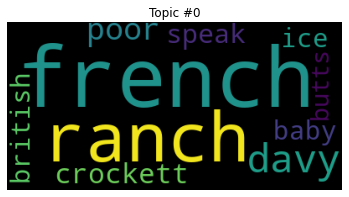

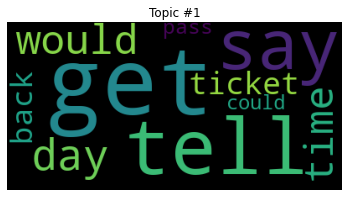

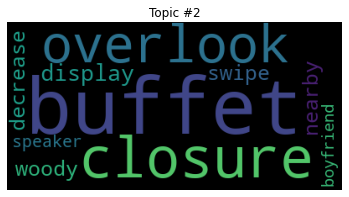

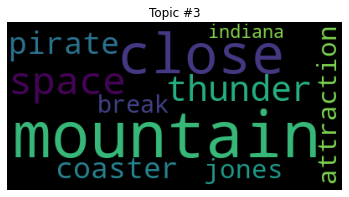

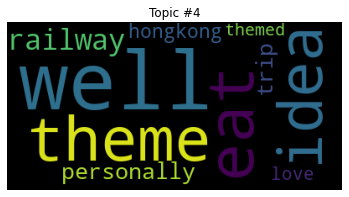

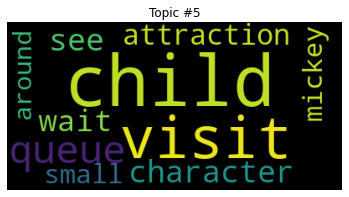

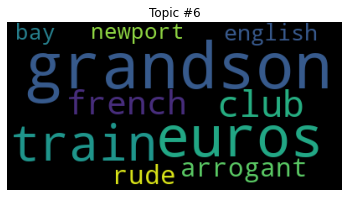

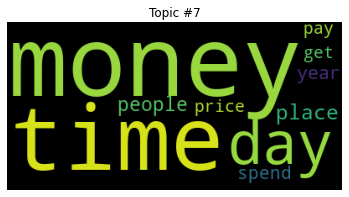

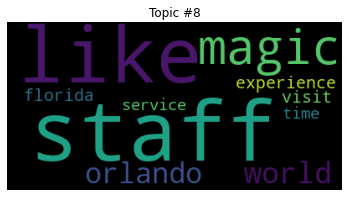

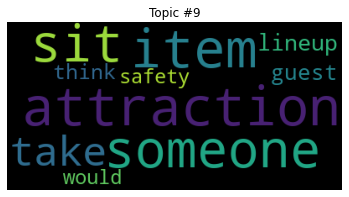

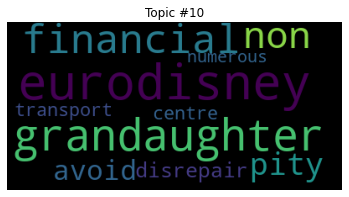

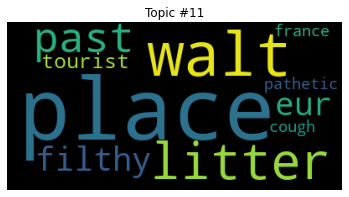

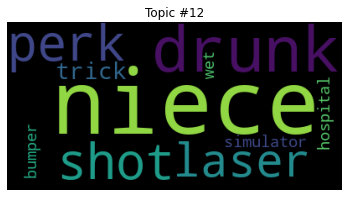

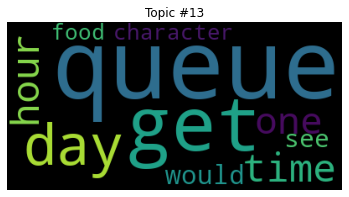

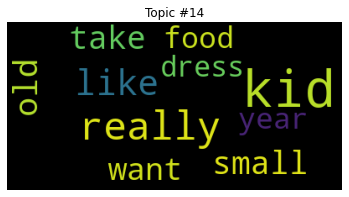

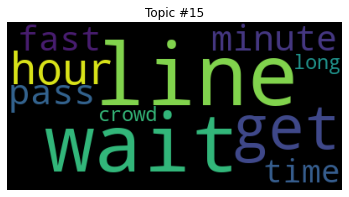

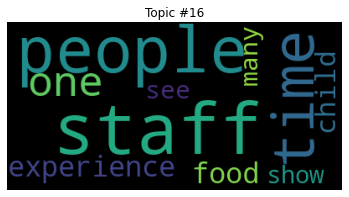

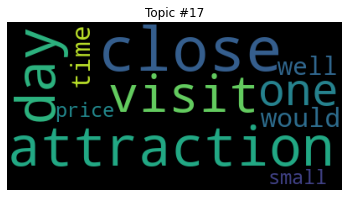

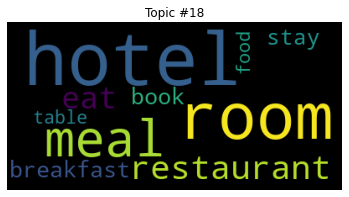

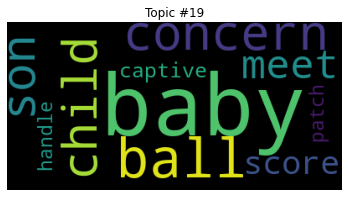

In [79]:
#visualizing the composition of each topic
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [80]:
bigram = gensim.models.phrases.Phrases(new_neg_list)
texts = [bigram[line] for line in new_neg_list]
texts = [bigram[line] for line in texts]

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [81]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [82]:
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
hdp_model.show_topics()

[(0,
  '0.015*get + 0.011*day + 0.011*time + 0.009*one + 0.009*queue + 0.007*wait + 0.007*would + 0.006*hour + 0.006*people + 0.006*food + 0.006*see + 0.005*visit + 0.005*minute + 0.005*say + 0.005*take + 0.005*even + 0.005*line + 0.005*well + 0.004*good + 0.004*place'),
 (1,
  '0.009*get + 0.009*day + 0.009*time + 0.007*wait + 0.006*one + 0.005*queue + 0.005*hour + 0.005*would + 0.004*people + 0.004*visit + 0.004*minute + 0.004*well + 0.004*long + 0.003*food + 0.003*take + 0.003*line + 0.003*experience + 0.003*see + 0.003*make + 0.003*staff'),
 (2,
  '0.008*get + 0.007*time + 0.007*day + 0.006*wait + 0.004*one + 0.004*people + 0.004*queue + 0.004*hour + 0.004*minute + 0.004*would + 0.004*line + 0.004*crowd + 0.003*even + 0.003*see + 0.003*visit + 0.003*good + 0.003*well + 0.003*long + 0.003*ticket + 0.003*food'),
 (3,
  '0.007*time + 0.007*get + 0.006*day + 0.004*visit + 0.004*hour + 0.004*one + 0.004*wait + 0.004*queue + 0.003*food + 0.003*see + 0.003*would + 0.003*people + 0.003*wel

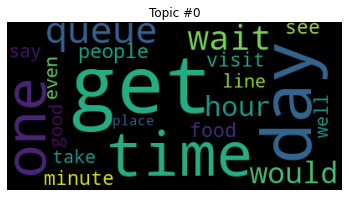

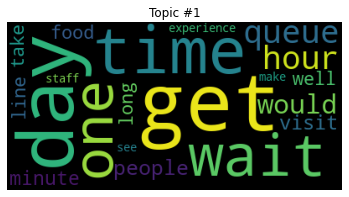

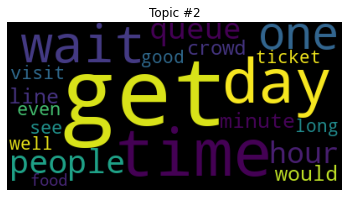

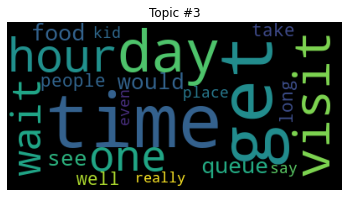

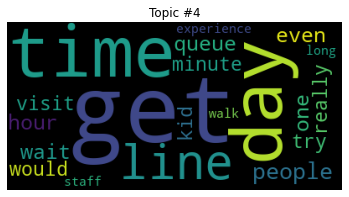

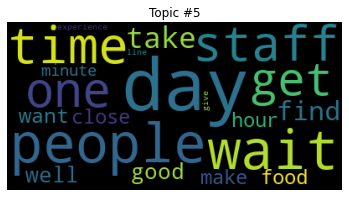

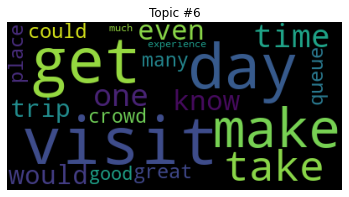

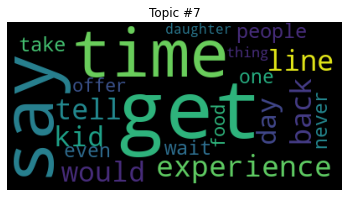

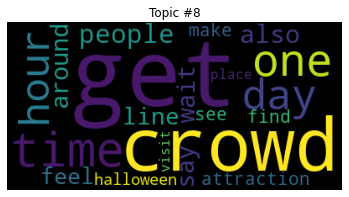

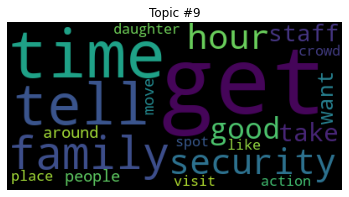

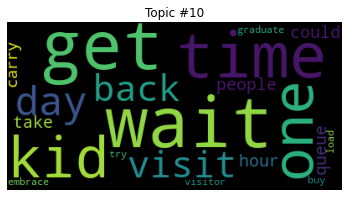

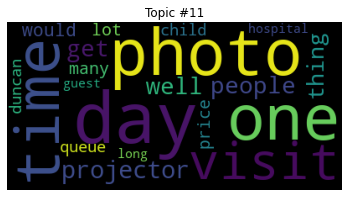

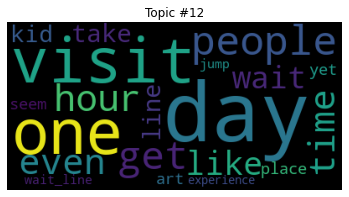

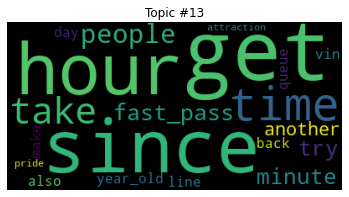

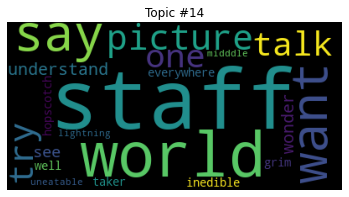

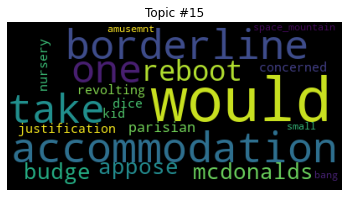

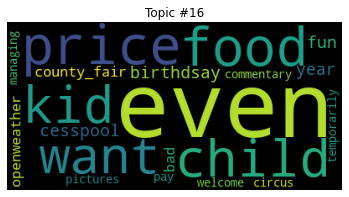

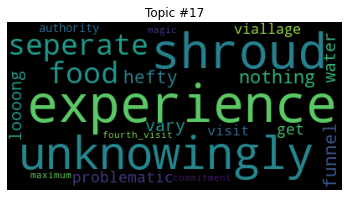

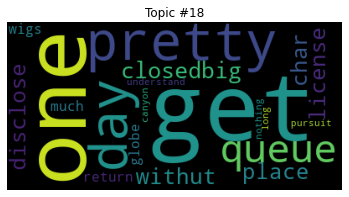

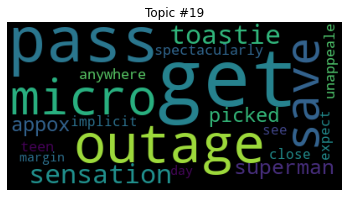

In [83]:
# HDP, the Hierarchical Drichlet Process is an unsupervised topic model which figures out the number of topics on it's own.
for t in range(20):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(hdp_model.show_topic(t))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

Les mots qui apparaissent dans les deux modèles sont ceux qu'on retrouve dans les n-grams et dans l'exploration des données. Les nouveaux mots qui apparaissent concernent la nourriture, la fumée des cigarettes (smoke), les toilettes (urine, bathroom).

## Actions à prendre

Dans les revues, les mots qui apparraissent le plus souvent sont la queue, l'attente, les mots qui correspondent au temps (minute, hour), le prix (ticket, price).

A partir des n-grams des mauvaises revues, on peut aussi voir que les gens parlent souvent de 'customer service', 'staff' ce qui laisse penser qu'il y a des problème avec le staff.

Il y a aussi de nombreuses attractions qui apparaissent dans les bonnes et mauvaises revues (ex: space mountain, thunder mountain, ect.). Certaines apparaissent avec le mot 'closed'. Il pourrait être intéressant de prévenir les gens lorsque les attractions sont fermées, et de prévenir sur les périodes où les attractions risquent d'être fermées (fortes chaleurs, vents, ect.)

Les mots 'year old' apparaissent avec le mot 'queue'. 'year old' dans ce context fait référence aux enfants, ce qui laisse penser qu'il faut occuper les enfants lors de l'attente des attractions car tout parent sait qu'il est très difficile de gérer des enfants qui attendent longtemps. Peut-être mettre en place des animations lors des longues queues ?

Le mot 'smoke' qui apparait, fait peut être référence aux gens qui fument dans la queue autour des enfants. Il pourrait être intéressant de faire des zones reservées pour fumer.

Les mots 'urine' et 'bathroom' laissent penser que les toillettes ne sont pas toujours clean à 100%. 

## Next steps

Les potentielles étapes pour améliorer cette analyse seraient :
- de fine-tuner les algorithmes de topic modeling utilisés dans ce projet
- appliquer d'autres algorithmes de clustering tels que HDBSCAN ou BERTTopic par exemple
- de discuter avec des professionnelles de Disneyland sur le sujet